### 1. Importing modules

In [1]:
from tensorflow.keras.models import Sequential # use to build neural network
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense 
# Conv2D is used extract the features from image
# MaxPooling2D reduces image dimensionality without losing important features
# Dropout reduces overfitting
# Flatten layer transforms 2D matrix of features into vector
# Dense layer is used to break the labels
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator # for image augmentation
import numpy as np
import matplotlib.pyplot as plt

### 2. Importing Dataset

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'amanthapa3032'
os.environ['KAGGLE_KEY'] = '328a968c455ffbf98af790ce2a4a3761'

In [3]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 99% 206M/207M [00:05<00:00, 48.5MB/s]
100% 207M/207M [00:05<00:00, 37.4MB/s]


In [4]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [5]:
# creating file paths for all directories
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir, 'Train')
test_dir = os.path.join(main_dir, 'Test')
valid_dir = os.path.join(main_dir, 'Validation')

train_mask_dir = os.path.join(train_dir, 'Mask')
train_nomask_dir = os.path.join(train_dir, 'Non Mask')

In [6]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['1383.jpg', '0309.jpg', '0638.jpg', '0493.jpg', '0249.jpg', '0994.jpg', '0420.jpeg', '0018.jpg', '1487.jpg', '1554.jpg']
['29.jpg', '105.jpg', '318.jpg', '122.jpg', '285.jpg', '61.jpg', '239.jpg', '246.jpg', '99.jpg', '208.jpg']


### 3. Image Visualization

['/content/New Masks Dataset/Train/Mask/1383.jpg', '/content/New Masks Dataset/Train/Mask/0309.jpg', '/content/New Masks Dataset/Train/Mask/0638.jpg', '/content/New Masks Dataset/Train/Mask/0493.jpg', '/content/New Masks Dataset/Train/Mask/0249.jpg', '/content/New Masks Dataset/Train/Mask/0994.jpg', '/content/New Masks Dataset/Train/Mask/0420.jpeg', '/content/New Masks Dataset/Train/Mask/0018.jpg']
['/content/New Masks Dataset/Train/Non Mask/29.jpg', '/content/New Masks Dataset/Train/Non Mask/105.jpg', '/content/New Masks Dataset/Train/Non Mask/318.jpg', '/content/New Masks Dataset/Train/Non Mask/122.jpg', '/content/New Masks Dataset/Train/Non Mask/285.jpg', '/content/New Masks Dataset/Train/Non Mask/61.jpg', '/content/New Masks Dataset/Train/Non Mask/239.jpg', '/content/New Masks Dataset/Train/Non Mask/246.jpg']


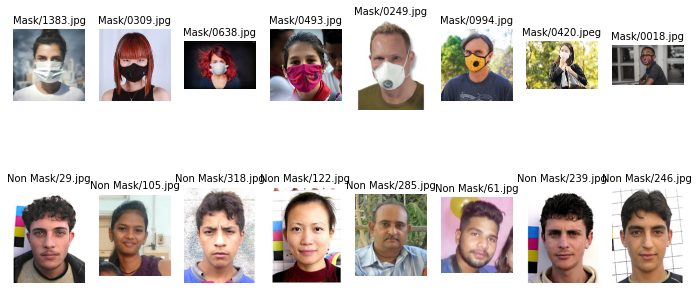

In [7]:
import matplotlib.image as mpimg # for loading, rescaling and displaying image
nrows = 4
ncols = 8
plt.figure(figsize =(12, 12))
mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir, i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir, i))

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic + nomask_pic

for i in range(0, len(merged_list)):
  data = merged_list[i].split('/', 4)[4]
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data, fontsize = 10)
  plt.imshow(image, cmap = 'gray')

plt.show()

### 4. Data Augmentation

In [8]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [10]:
train_generator.image_shape

(150, 150, 3)

### 5. Building CNN

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [12]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 38s 2s/step - loss: 3.1580 - accuracy: 0.5033 - val_loss: 0.6928 - val_accuracy: 0.5131
Epoch 2/30
19/19 [==============================] - 36s 2s/step - loss: 0.6651 - accuracy: 0.6250 - val_loss: 0.6921 - val_accuracy: 0.5131
Epoch 3/30
19/19 [==============================] - 36s 2s/step - loss: 0.6064 - accuracy: 0.7167 - val_loss: 0.6252 - val_accuracy: 0.8399
Epoch 4/30
19/19 [==============================] - 36s 2s/step - loss: 0.4366 - accuracy: 0.8233 - val_loss: 0.5334 - val_accuracy: 0.7908
Epoch 5/30
19/19 [==============================] - 36s 2s/step - loss: 0.3828 - accuracy: 0.8433 - val_loss: 0.4260 - val_accuracy: 0.8856
Epoch 6/30
19/19 [==============================] - 36s 2s/step - loss: 0.3220 - accuracy: 0.8683 - val_loss: 0.3939 - val_accuracy: 0.8660
Epoch 7/30
19/19 [==============================] - 36s 2s/step - loss: 0.3039 - accuracy: 0.8850 - val_loss: 0.3629 - val_accuracy: 0.8725
Epoch 8/30
19/19 [==

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

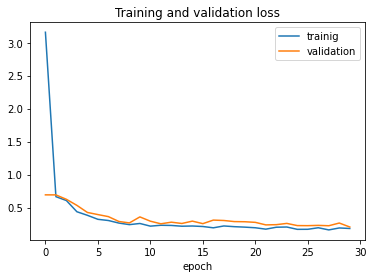

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

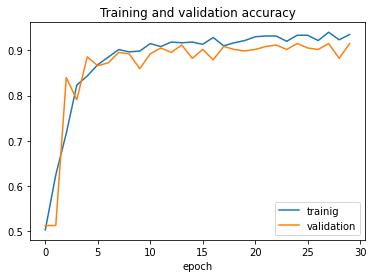

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [17]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 2s 390ms/step - loss: 0.1754 - accuracy: 0.9300
test acc :0.9300000071525574 test loss:0.17538000643253326


In [18]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()
# for fname in uploaded.keys():
#   img_path='/content/'+fname
#   img = image.load_img(img_path , target_size=(150,150))
#   images = image.img_to_array(img)
#   images=np.expand_dims(images,axis=0)
#   prediction = model.predict(images)
#   print(fname)
#   if prediction==0:
#     print('mask')
#   else:
#     print('nomask')